In [13]:
import os
import glob
import astropy
from astropy                  import units    as u
import pandas                 as pd
import numpy                  as np
import matplotlib.pyplot      as plt
from astropy.io import fits
from astropy.modeling.models  import BlackBody
from astropy.cosmology import Planck18 as cosmo
from lmfit                    import Model
from lmfit.models             import GaussianModel, VoigtModel, ConstantModel

In [14]:
path = '/Users/oliverbenjaminrossi/Visual Studio/Università/Laboratory of Data Analysis/Galaxy-Age/SDSS fits/'
file = 'S4'
extension = '.fits'
filename = path+file+extension

In [15]:
flux = fits.open(filename)
flussi = flux[1].data 
log_w = flussi['loglam']
flu = flussi['flux'] * 10**(-17)
wave = 10**log_w

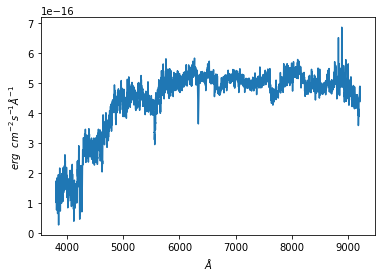

In [16]:
plt.plot(wave,flu)
plt.xlabel('$\AA$')
plt.ylabel('$erg$  $cm^{-2}s^{-1}\AA^{-1}$')
plt.show()

Text(0, 0.5, '$erg$  $cm^{-2}s^{-1}\\AA^{-1}$')

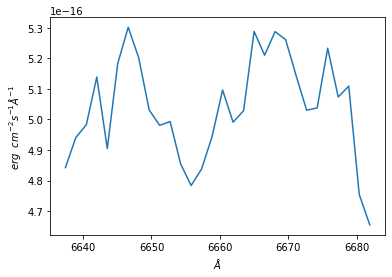

In [17]:
inizio = 2420
fine   = 2450
H_alpha = wave[inizio:fine]
H_alpha_flux = flu[inizio:fine]


plt.clf()
plt.plot(H_alpha,H_alpha_flux)
plt.xlabel('$\AA$')
plt.ylabel('$erg$  $cm^{-2}s^{-1}\AA^{-1}$')

[[Model]]
    (Model(gaussian) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 808
    # data points      = 30
    # variables        = 4
    chi-square         = 5.9943e-33
    reduced chi-square = 2.3055e-34
    Akaike info crit   = -2319.87093
    Bayesian info crit = -2314.26614
    R-squared          = 1.00000000
[[Variables]]
    amplitude: -1.8728e-16 +/- 3.2940e-12 (1758919.09%) (init = 1e-10)
    center:     6681.16454 +/- 557.843227 (8.35%) (init = 6690)
    sigma:      0.43124635 +/- 3537.39255 (820271.88%) (init = 5)
    c:          5.0613e-16 +/- 2.9221e-18 (0.58%) (init = 2.5e-10)
    fwhm:       1.01550753 +/- 8329.92273 (820271.88%) == '2.3548200*sigma'
    height:    -1.7325e-16 +/- 4.4684e-12 (2579190.98%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 1.000
    C(amplitude, center) = 1.000
    C(center, sigma)     = 1.000
    C(sigma, c)      

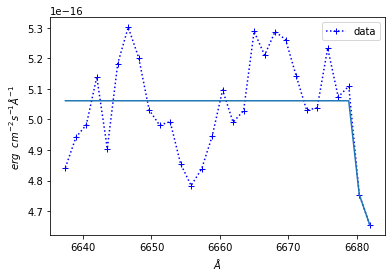

The galaxy is at a redshift z of  0.017756533089971382


In [18]:
model = GaussianModel() + ConstantModel()

params = model.make_params(amplitude=1e-10, center=6690, sigma=5, c=2.5e-10)

# do the fit, print out report with results 
result = model.fit(H_alpha_flux, params, x=H_alpha)
print(result.fit_report())


# plot data, best fit, fit interpolated to `xx`
plt.plot(H_alpha, H_alpha_flux, 'b+:', label='data')
plt.plot(H_alpha, result.best_fit)
plt.legend()
plt.xlabel('$\AA$')
plt.ylabel('$erg$  $cm^{-2}s^{-1}\AA^{-1}$')
plt.show()

# Find the redshift
z=result.params['center'].value/6564.6-1
print("The galaxy is at a redshift z of ",result.params['center'].value/6564.6-1)

In [19]:
z = 0.07477 #redshift of S4

In [20]:
dist = cosmo.luminosity_distance(z).to(u.cm)
lum_s1 = 4*np.pi*(dist**2)*flu*(1+z)
r_lum_s1 = wave/(1+z)
print(dist, cosmo.luminosity_distance(z))

1.0792761761172832e+27 cm 349.76958791516006 Mpc


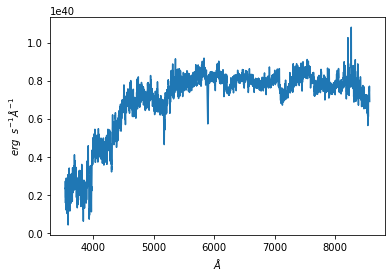

In [21]:
plt.plot(r_lum_s1, lum_s1)
plt.xlabel('$\AA$')
plt.ylabel('$erg$  $s^{-1}\AA^{-1}$')
plt.show()

In [22]:
def bb (age_gal, masses, M_max):
    
    flux = []

    alpha  = 2.35
    const  = 100**(2-alpha)/(2-alpha) - 0.1**(2-alpha)/(2-alpha)
    
    wav = np.arange(3500,9000) * u.AA
    scale = u.erg/(u.cm**2*u.s*u.AA*u.sr)
    
    for i in range (len(masses)):
        
        T_sun   = 5780 #K
        age_sun = 10   #Gyr
        temperatura = masses[i]**(4/7) * T_sun
        age_star    = masses[i]**(-2)  * age_sun
        luminosity  = masses[i]**(3.5)
        
        if (age_star > age_gal):
            
            bb      = BlackBody(temperature=temperatura*u.K, scale=1*scale)
            nstars  = M_tot * masses[i]**(-2.35) / const
            flux.append(bb(wav)*nstars*luminosity/bb.bolometric_flux.value)
            
    return flux


In [23]:
M_tot =4*10**9

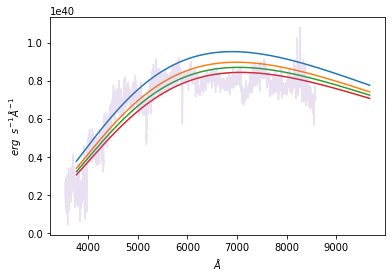

In [24]:
age_gal = [12,12.5,12.8,13] #Gyr
masses  = np.linspace(0.1,100,10000)
wav     = np.arange(3500,9000) * u.AA

for age in age_gal:
    
    fluxes   = bb(age, masses, M_tot)
    flux_tot = np.sum(fluxes, axis=0)

    luminosity = flux_tot*(4*10**33)
    
    wav_ = wav*(1+z)
    plt.plot(wav_, luminosity)
    #plt.yscale('log')
    plt.xlabel('$\AA$')
    plt.ylabel('$erg$  $s^{-1}\AA^{-1}$')
    
plt.plot(r_lum_s1, lum_s1, alpha=0.2)  
plt.show()